In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn import linear_model


C:\Users\sarth\AppData\Local\Temp\ipykernel_10336\3113432386.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)      

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
#each company dictionary (AAPL, GOOG, MSFT, AMZN) will have a "company_name" key with the corresponding company name

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [12]:
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.085052,68039400,APPLE
2022-08-15,171.520004,173.389999,171.350006,173.190002,172.168640,54091700,APPLE
2022-08-16,172.779999,173.710007,171.660004,173.029999,172.009583,56377100,APPLE
2022-08-17,172.770004,176.149994,172.570007,174.550003,173.520599,79542000,APPLE
2022-08-18,173.750000,174.899994,173.119995,174.149994,173.122971,62290100,APPLE
2022-08-19,173.029999,173.740005,171.309998,171.520004,170.508469,70346300,APPLE
2022-08-22,169.690002,169.860001,167.139999,167.570007,166.581772,69026800,APPLE
2022-08-23,167.080002,168.710007,166.649994,167.229996,166.243774,54147100,APPLE
2022-08-24,167.320007,168.110001,166.250000,167.529999,166.542007,53841500,APPLE


In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.747132,182.201833,179.410757,180.908327,180.447321,5.750207e+07
std,9.391555,9.253115,9.314748,9.251839,9.325344,1.723110e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.404830e+07
25%,173.139999,174.345001,171.930000,173.565002,173.105247,4.685660e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.363130e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.267560e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-30 to 2024-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [12]:
import seaborn as sns

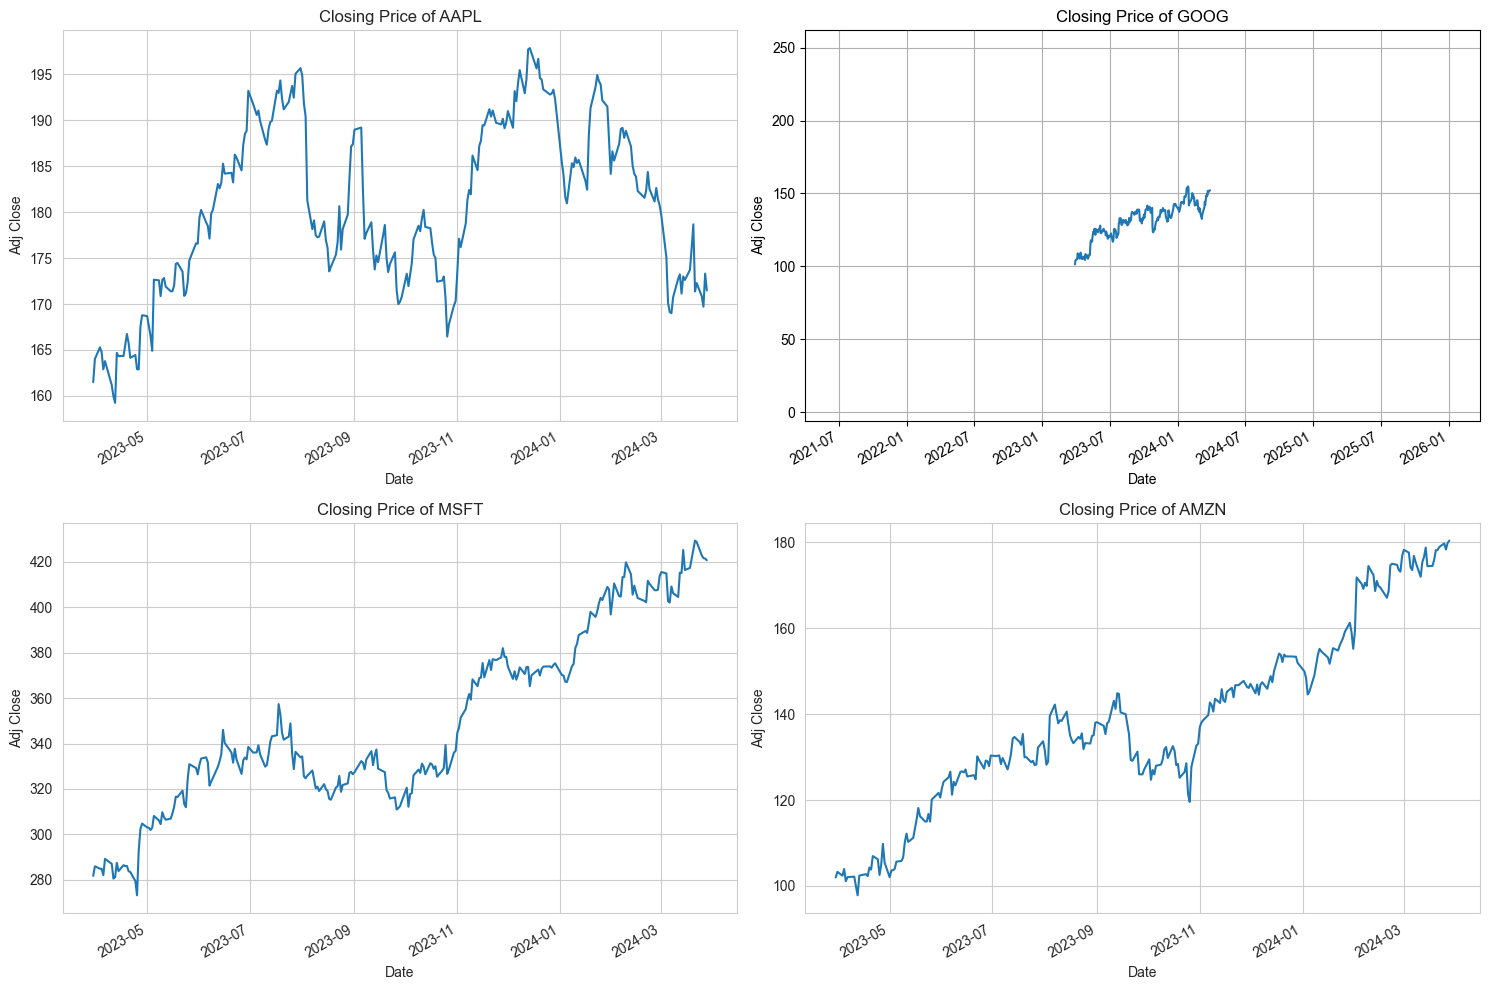

In [13]:
fig= plt.figure(figsize=(15,10))
fig.add_subplot(222, ymargin=2, xmargin=2)
sns.set_style('whitegrid')
for i, company in enumerate(company_list, 1):    #enumerate(iterable, start=0). Iterable: any object that supports iteration.Start: the index value from which the counter is to be started, by default it is 0
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
fig.tight_layout()

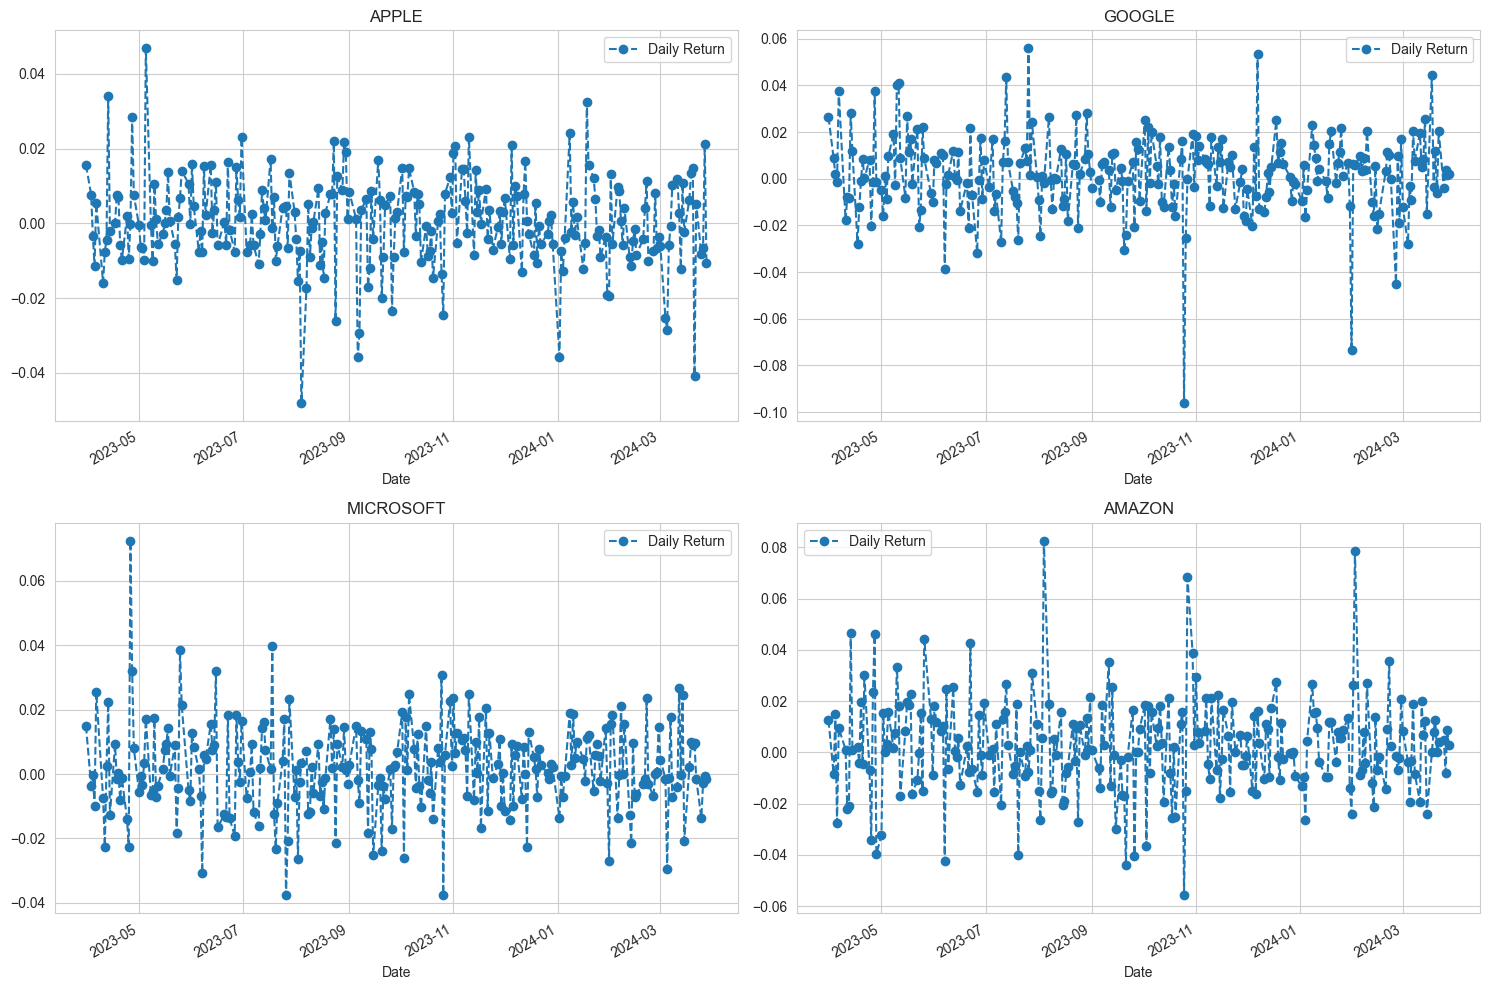

In [14]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


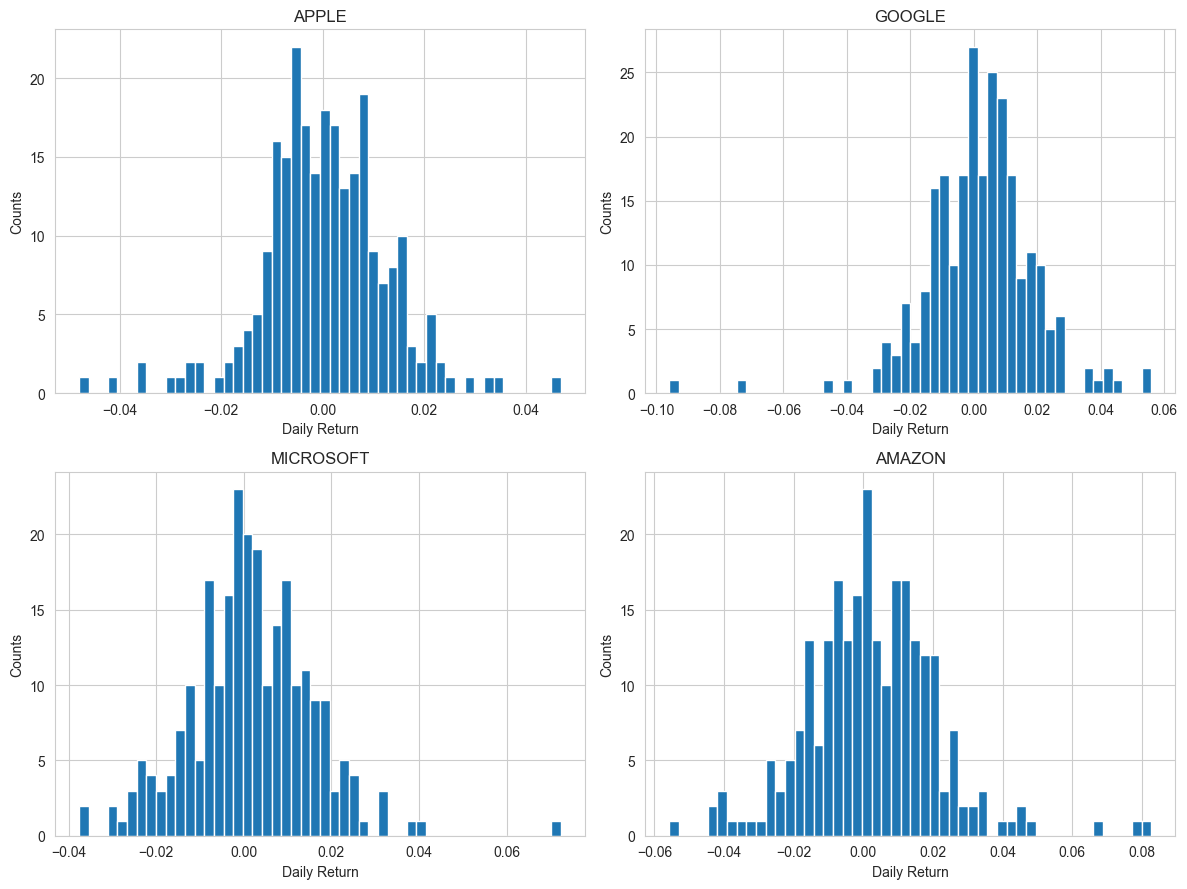

In [15]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [16]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return
Date,,,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700,APPLE,NaN
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024490,68749800,APPLE,0.015644
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,APPLE,0.007702
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300,APPLE,-0.003250
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE,-0.011290


In [17]:
dfAPPL= AAPL['Adj Close'].pct_change()
dfGOOG= GOOG['Adj Close'].pct_change()
dfMSFT= MSFT['Adj Close'].pct_change()
dfAMZN= AMZN['Adj Close'].pct_change()

In [18]:
dfAPPL.head()

Date
2023-03-30         NaN
2023-03-31    0.015644
2023-04-03    0.007702
2023-04-04   -0.003250
2023-04-05   -0.011290
Name: Adj Close, dtype: float64

In [19]:
tech_list=[dfAPPL, dfGOOG, dfMSFT , dfAMZN]

In [20]:
df_tech = pd.concat(tech_list, axis=1)
df_tech.columns = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [21]:
df_tech

,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2023-03-30,NaN,NaN,NaN,NaN
2023-03-31,0.015644,0.026451,0.014962,0.012647
2023-04-03,0.007702,0.008750,-0.003711,-0.008520
2023-04-04,-0.003250,0.002002,-0.000174,0.015038
2023-04-05,-0.011290,-0.001617,-0.009889,-0.027417
...,...,...,...,...
2024-03-22,0.005310,0.020371,-0.001467,0.004042
2024-03-25,-0.008300,-0.004085,-0.013715,0.004696
2024-03-26,-0.006673,0.003639,-0.002861,-0.007846


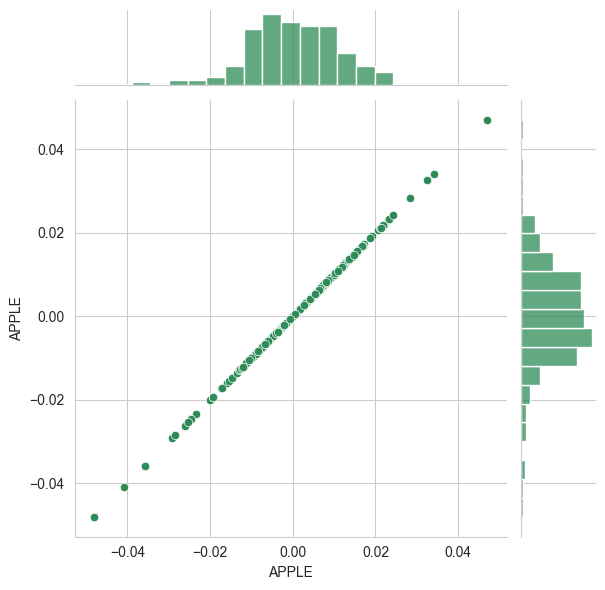

In [22]:
# Comparing apple to itself should show a perfectly linear relationship
sns.jointplot(x='APPLE', y='APPLE', data=df_tech, kind='scatter', color='seagreen')

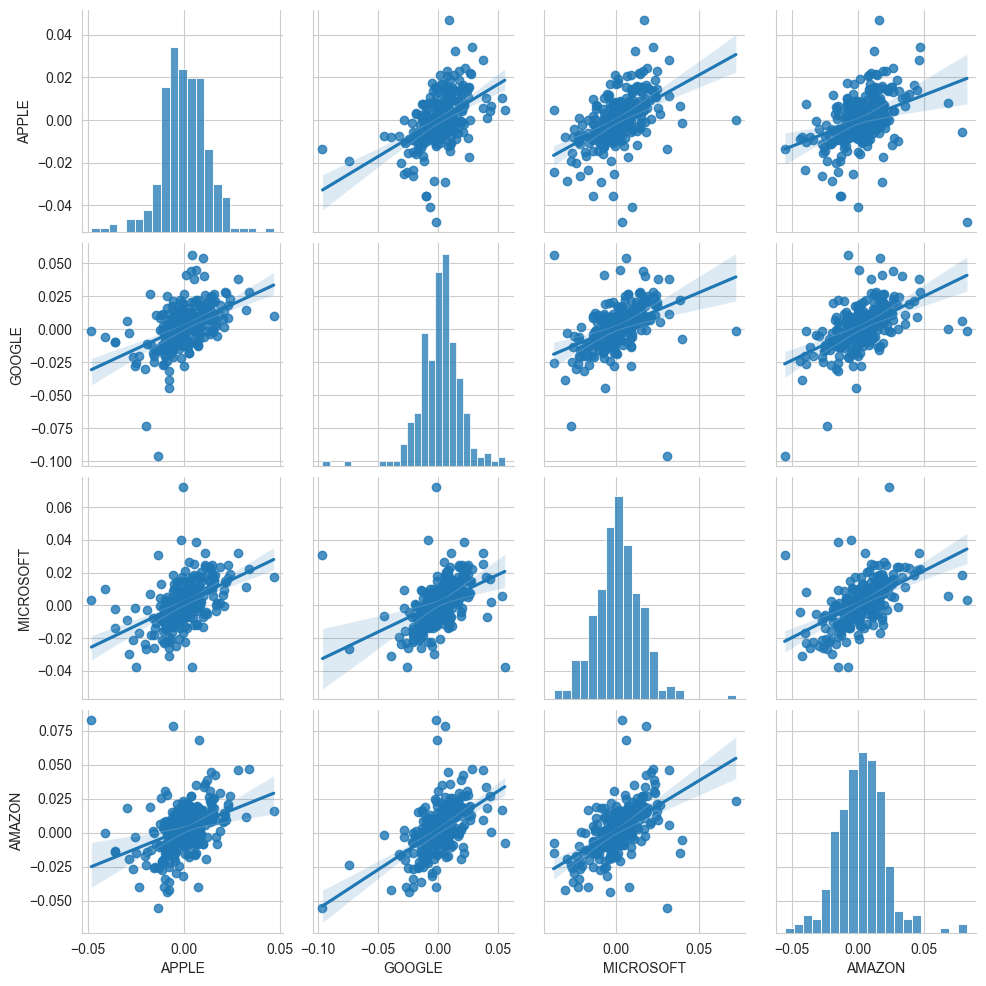

In [23]:
sns.pairplot(df_tech, kind='reg')

In [24]:
#Plot data and a linear regression model fit.

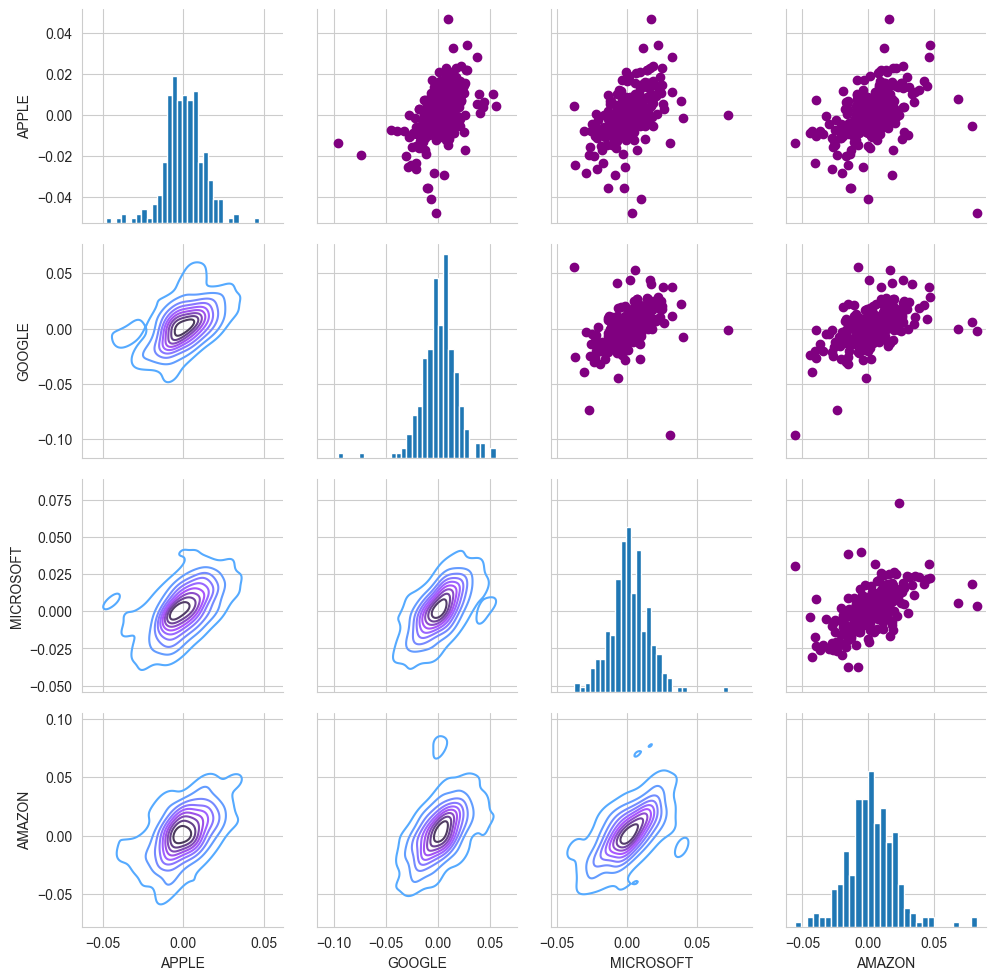

In [25]:
return_fig = sns.PairGrid(df_tech.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')  #coold for color transition

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock return')

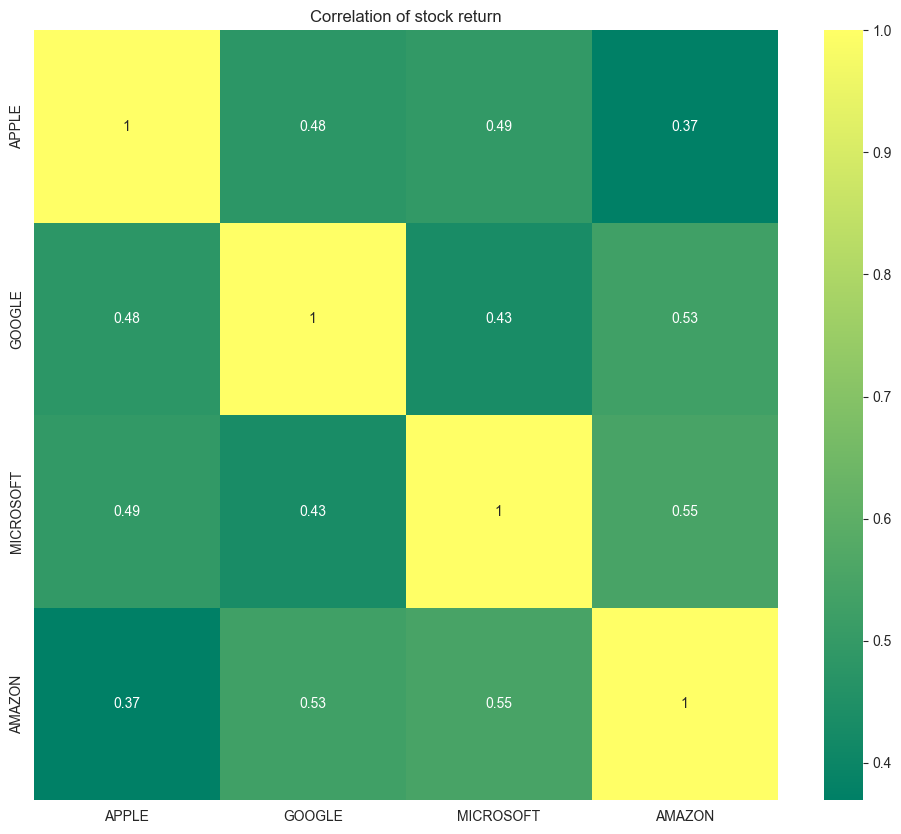

In [26]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_tech.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')



In [27]:
apple_df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497986,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024460,68749800
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700


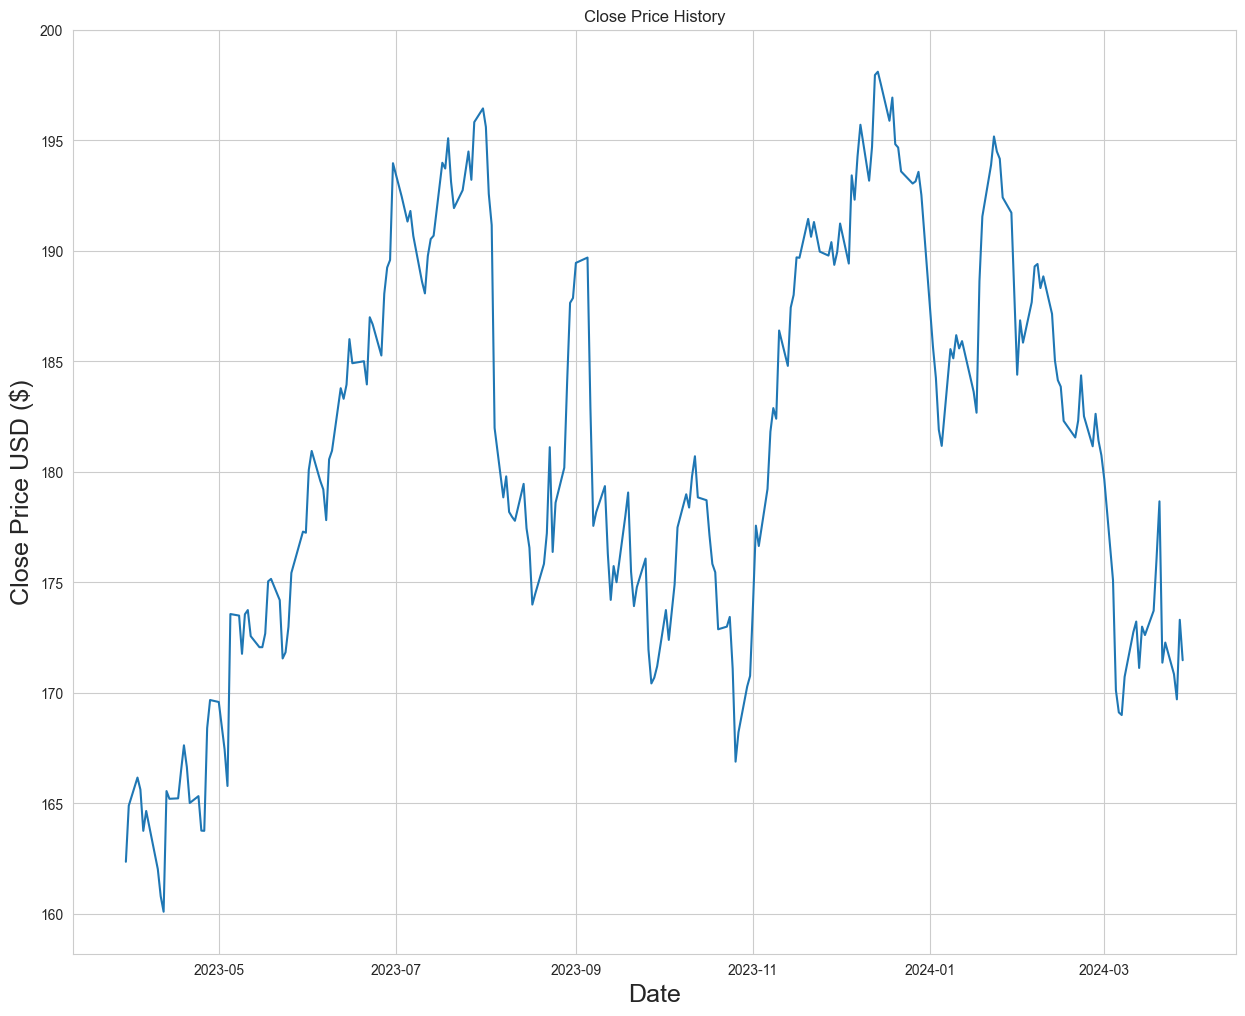

In [29]:
plt.figure(figsize=(15,12))
plt.title('Close Price History')
plt.plot(apple_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler

data= apple_df['Close']
dataset= data.values     #converted df into numpy array
dataset.dtype

dtype('float64')

In [31]:
len(dataset)

251

In [32]:
train_data_len= int(np.ceil(len(dataset)* 0.95))
train_data_len

239

In [33]:
dataset= dataset.reshape(-1,1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
#Transform features by scaling each feature to a given range.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#Fit to data, then transform it.Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

scaled_data

array([[0.0594579 ],
       [0.12628225],
       [0.15969463],
       [0.14548802],
       [0.09629016],
       [0.11996838],
       [0.05077593],
       [0.01841613],
       [0.        ],
       [0.1436462 ],
       [0.13443834],
       [0.13496423],
       [0.16758737],
       [0.19810576],
       [0.17232278],
       [0.12943959],
       [0.13759528],
       [0.0965535 ],
       [0.09629016],
       [0.21862664],
       [0.25203862],
       [0.24967092],
       [0.22204652],
       [0.19336995],
       [0.14969713],
       [0.35438051],
       [0.3525387 ],
       [0.30702446],
       [0.35411716],
       [0.35911591],
       [0.32807164],
       [0.3149172 ],
       [0.3149172 ],
       [0.33122858],
       [0.39331752],
       [0.39621152],
       [0.37095482],
       [0.30149942],
       [0.30886588],
       [0.33912132],
       [0.40331462],
       [0.45251248],
       [0.45119696],
       [0.52591405],
       [0.5485397 ],
       [0.51249667],
       [0.50276252],
       [0.466

In [35]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [36]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.0594579 , 0.12628225, 0.15969463, 0.14548802, 0.09629016,
       0.11996838, 0.05077593, 0.01841613, 0.        , 0.1436462 ,
       0.13443834, 0.13496423, 0.16758737, 0.19810576, 0.17232278,
       0.12943959, 0.13759528, 0.0965535 , 0.09629016, 0.21862664,
       0.25203862, 0.24967092, 0.22204652, 0.19336995, 0.14969713,
       0.35438051, 0.3525387 , 0.30702446, 0.35411716, 0.35911591,
       0.32807164, 0.3149172 , 0.3149172 , 0.33122858, 0.39331752,
       0.39621152, 0.37095482, 0.30149942, 0.30886588, 0.33912132,
       0.40331462, 0.45251248, 0.45119696, 0.52591405, 0.5485397 ,
       0.51249667, 0.50276252, 0.46619321, 0.5385426 , 0.54880304,
       0.62325679, 0.61062865, 0.62746631, 0.68166251, 0.65298594,
       0.65535364, 0.62772965, 0.70770844, 0.69928941, 0.66219421])]
[0.7355957773171911]

[array([0.0594579 , 0.12628225, 0.15969463, 0.14548802, 0.09629016,
       0.11996838, 0.05077593, 0.01841613, 0.        , 0.1436462 ,
       0.13443834, 0.13496423, 0.167

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=1, epochs=1)

ModuleNotFoundError: No module named 'tensorflow.compat'

In [49]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


6.762424014371436